**Exercício 01**
Seja $T:\mathbb{R}^2 \to \mathbb{R}^2$ a transformação linear tal que $T(1,0) = (cos\;\theta,\;sen\;\theta)$ e $T(0,1) = (-sen\;\theta,\;cos\;\theta)$, com $\theta \in \mathbb{R}$.

- Determine a transformação $T$ e sua matriz na base canônica.
- Implemente uma função que recebe um parâmetro $\theta$ e retorna a matriz da transformação $T$.
- Aplique essa transformação no triângulo de vértices $(-1,1)$, $(1,1)$ e $(0,1)$ com $\theta=\pi / 4$ e visualize o resultado. O que você pode observar em relação a transformação $T$ ?

Matriz da transformação T:

[[ 0.5       -0.8660254] 
 [ 0.8660254  0.5      ]]

Vértices originais:
 [[-1  1]
 [ 1  2]
 [ 0  1]]

Vértices transformados:
 [[-1.3660254  -0.3660254 ]
 [-1.23205081  1.8660254 ]
 [-0.8660254   0.5       ]]


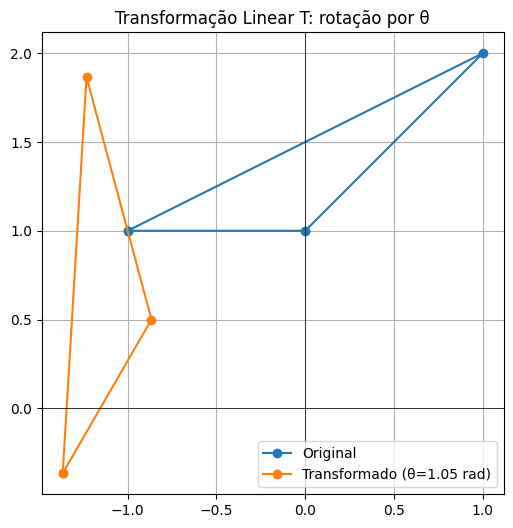

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def T_matrix(theta):
    """
    T(1,0) = (cosθ, senθ)
    T(0,1) = (-senθ, cosθ)
    """
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]])

def aplicar_transformacao(vertices, theta):
    A = T_matrix(theta)
    return (A @ vertices.T).T

def plotar_transformacao(originais, transformados, theta):
    
    plt.figure(figsize=(6,6))

    original = np.vstack([originais, originais[0]])
    aposTransformacao = np.vstack([transformados, transformados[0]])

    plt.plot(original[:,0], original[:,1], 'o-', label='Original')
    plt.plot(aposTransformacao[:,0], aposTransformacao[:,1], 'o-', label=f'Transformado (θ={theta:.2f} rad)')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Transformação Linear T: rotação por θ")
    plt.legend()
    plt.grid(True)
    plt.show()

entrada = input("Escreva o ângulo em radianos (ex.: 1.57, pi/4, 2*pi/3): ")

entrada = entrada.replace("pi", "np.pi")

try:
    theta = eval(entrada)
except:
    print("Entrada inválida!")
    exit(1)

triangulo = np.array([[-1,1], [1,2], [0,1]]) 
triangulo_T = aplicar_transformacao(triangulo, theta)  

print("Matriz da transformação T:\n")
sp.pprint(T_matrix(theta))
print("\nVértices originais:\n", triangulo)
print("\nVértices transformados:\n", triangulo_T)

plotar_transformacao(triangulo, triangulo_T, theta)


**Exercício 02**
Determine uma transformação linear $T:\mathbb{R}^5 \to \mathbb{R}^3$ tal que $Im(T) = [(1,0,0),(0,1,0),(1,1,1)]$ e $Ker(T) = [(1,1,1,1,1),(1,1,1,1,0)]$.

In [8]:
import sympy as sp

v1 = sp.Matrix([1, 1, 1, 1, 1])
v2 = sp.Matrix([1, 1, 1, 1, 0])

u1 = sp.Matrix([1, 0, 0])
u2 = sp.Matrix([0, 1, 0])
u3 = sp.Matrix([1, 1, 1])

# Peguei outros três vetores para transformar na imagem... Peguei canônicos mesmo
w1 = sp.Matrix([1, 0, 0, 0, 0])
w2 = sp.Matrix([0, 1, 0, 0, 0])
w3 = sp.Matrix([0, 0, 1, 0, 0])

condicoes = [
    (v1, sp.zeros(3, 1)),
    (v2, sp.zeros(3, 1)),
    (w1, u1),
    (w2, u2),
    (w3, u3),
]

a = sp.symbols('a0:15') 
A = sp.Matrix([[a[0], a[1], a[2], a[3], a[4]],
               [a[5], a[6], a[7], a[8], a[9]],
               [a[10], a[11], a[12], a[13], a[14]]])

eqs = []
for v, Tv in condicoes:
    eqs += list(A * v - Tv)

sol = sp.solve(eqs, a, dict=True)

if sol:
    A_sol = A.subs(sol[0])
    print("Matriz T encontrada (3x5):")
    sp.pprint(A_sol)

    # Verificação
    print("\nVerificação das condições:")
    for v, Tv in condicoes:
        print(f"T*{v.T} = {(A_sol * v).T} (esperado {Tv.T})")
else:
    print("Nenhuma solução encontrada!")


Matriz T encontrada (3x5):
⎡1  0  1  -2  0⎤
⎢              ⎥
⎢0  1  1  -2  0⎥
⎢              ⎥
⎣0  0  1  -1  0⎦

Verificação das condições:
T*Matrix([[1, 1, 1, 1, 1]]) = Matrix([[0, 0, 0]]) (esperado Matrix([[0, 0, 0]]))
T*Matrix([[1, 1, 1, 1, 0]]) = Matrix([[0, 0, 0]]) (esperado Matrix([[0, 0, 0]]))
T*Matrix([[1, 0, 0, 0, 0]]) = Matrix([[1, 0, 0]]) (esperado Matrix([[1, 0, 0]]))
T*Matrix([[0, 1, 0, 0, 0]]) = Matrix([[0, 1, 0]]) (esperado Matrix([[0, 1, 0]]))
T*Matrix([[0, 0, 1, 0, 0]]) = Matrix([[1, 1, 1]]) (esperado Matrix([[1, 1, 1]]))
